In [56]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
sber = pd.read_csv("SBER.ME.csv")
vtb = pd.read_csv("VTBR.ME.csv")

In [40]:
sber.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-25,286.500000,287.010010,283.850006,285.579987,268.854828,32071050
1,2021-03-26,288.630005,292.750000,288.320007,288.989990,272.065125,51572130
2,2021-03-29,289.720001,294.089996,289.269989,293.049988,275.887329,40847890
3,2021-03-30,294.859985,295.720001,291.500000,293.450012,276.263947,36333610
4,2021-03-31,294.000000,294.420013,290.260010,291.279999,274.221008,44193590


In [41]:
vtb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-25,0.03792,0.03817,0.03767,0.03783,0.035656,12724570001
1,2021-03-26,0.03810,0.03839,0.03810,0.03823,0.036033,10350100000
2,2021-03-29,0.03833,0.03890,0.03814,0.03866,0.036438,23889930000
3,2021-03-30,0.03895,0.03985,0.03885,0.03975,0.037465,31473710000
4,2021-03-31,0.03992,0.04289,0.03985,0.04253,0.040086,173810890000


In [42]:
def get_average_drop(df, columns):
    df['Average'] = 0
    for column in columns:
        df['Average'] += df[column]
        df = df.drop(column, axis=1)
    df['Average'] /= 4
    return df

In [43]:
sber1 = get_average_drop(sber, ['Open', 'High', 'Low', 'Close', 'Adj Close'])
sber1.head()

,Date,Volume,Average
0,2021-03-25,32071050,352.948708
1,2021-03-26,51572130,357.688782
2,2021-03-29,40847890,360.504326
3,2021-03-30,36333610,362.948486
4,2021-03-31,44193590,361.045257


In [44]:
vtb1 = get_average_drop(vtb, ['Open', 'High', 'Low', 'Close', 'Adj Close'])
vtb1.head()

,Date,Volume,Average
0,2021-03-25,12724570001,0.046811
1,2021-03-26,10350100000,0.047213
2,2021-03-29,23889930000,0.047617
3,2021-03-30,31473710000,0.048716
4,2021-03-31,173810890000,0.051319


In [45]:
def get_absolute_buy(df):
    df['Absolute'] = df['Volume'] * df['Average']
    return df

In [46]:
sber2 = get_absolute_buy(sber1)
sber2.tail()

,Date,Volume,Average,Absolute
233,2022-02-21,1084508440,276.942501,3.003465e+11
234,2022-02-22,946020570,255.662498,2.418620e+11
235,2022-02-24,829355880,172.417496,1.429955e+11
236,2022-02-25,396287150,163.187500,6.466911e+10
237,2022-03-25,48581860,168.454998,8.183857e+09


In [47]:
vtb2 = get_absolute_buy(vtb1)
vtb2.tail()

,Date,Volume,Average,Absolute
233,2022-02-21,472628730000,0.043388,2.050618e+10
234,2022-02-22,417837380000,0.040865,1.707492e+10
235,2022-02-24,425751480000,0.029202,1.243301e+10
236,2022-02-25,220823080000,0.025152,5.554253e+09
237,2022-03-25,2408025152,0.022924,5.520097e+07


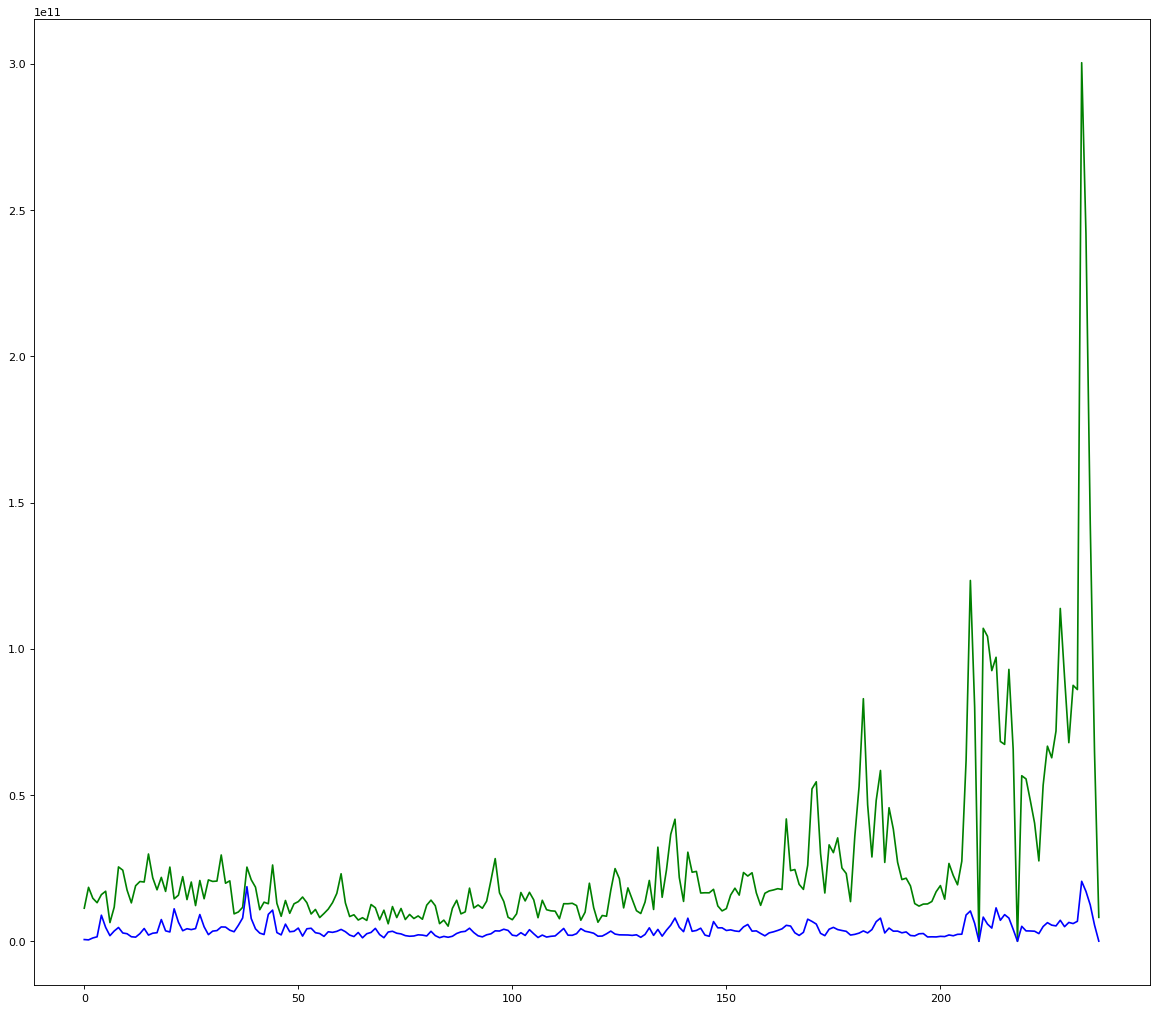

In [57]:
plt.figure(figsize=(18, 16), dpi=80)
plt.plot(sber2['Absolute'], 'g')
plt.plot(vtb2['Absolute'], 'b')
plt.show()